# Project 1

We used `transformers` sentiment-analysis pipeline to conduct an advanced sentiment analysis. Using this pipeline, we did not need to clean our data, because the bert model under the pipeline comes with a custom tokenizer to account for special characters and white space. The Sentiment Analysis pipeline also takes into account stop words.

In [ ]:
from transformers import pipeline
classifier = pipeline("sentiment-analysis")

We could not get our twitter API to work, so we pulled our data from https://www.kaggle.com/datasets/fastcurious/twitter-dataset-february-2024?resource=download. We load our data in a json format to be processed for sentiment analysis.

In [10]:
with open(r"C:\Users\kristian.nordby\OneDrive - West Point\Desktop\AY 25-1\NLP\dataset_tweet-scraper_2024-03-04_15-49-10-416.json",'r') as f:
    content = json.load(f)

The following functions filter out the topic we are interested in then run a sentiment analysis using the pipeline. `get_text()` cleans our data to only include the text from tweets, `pull_topic()` filters the tweets to only include tweets that include our topics of interest, and `conduct_sentiment_analysis()` calls the transformers sentiment analysis pipeline. `pull_sentiment()` brings the functions together to run using all tweets and a topic as parameters, returning the sentiment analysis.

In [31]:
def get_text(tweets:list)->list:
    text = []
    for tweet in tweets:
        if tweet['type']=='tweet':
            text.append(tweet['text'])
    return text

text = get_text(content)

In [46]:
def pull_topic(tweets:list,topic:str)->list:
    tweets_ontopic=[]
    for tweet in tweets:
        if topic in str(tweet.lower()):
            tweets_ontopic.append(tweet)
    return tweets_ontopic

In [72]:
def conduct_sentiment_analysis(tweets):
    sentiments = []
    for tweet in tweets:
        if len(tweet)>512:
            tweet = tweet[:512]
        sentiments.append(classifier(tweet)[0]['label'])
    sentiments = ' '.join(sentiments)
    positive_prop = sentiments.count('POSITIVE')/len(tweets)
    neutral_prop = sentiments.count('NEUTRAL')/len(tweets)
    negative_prop = sentiments.count('NEGATIVE')/len(tweets)
    print(f"Positive Proportion: {positive_prop}, Negative Proportion: {negative_prop}, Neutral Proportion: {neutral_prop}")
    return positive_prop,negative_prop,neutral_prop

In [80]:
def pull_sentiments(tweets:list,topic:str):
    tweets_ontopic = pull_topic(tweets=tweets,topic=topic)
    print(f"{len(tweets_ontopic)} tweets mention {topic}.")
    pos,neg,neu = conduct_sentiment_analysis(tweets_ontopic)
    return pos,neg,neu

In our project, we were interested in how certain political icons were depicted by twitter users. We focused on Joe Biden, Donald Trump, Kamala Harris, and the white house. In our analysis, we wanted to see if certain politicians were depicted better than others, and whether or not the overall sentiment of politics (using key word "white house" as our baseline) reflected the average sentiment for our candidates of interest.

In [81]:
pull_sentiments(text,"biden")

58 tweets mention biden.
Positive Proportion: 0.1896551724137931, Negative Proportion: 0.8103448275862069, Neutral Proportion: 0.0


(0.1896551724137931, 0.8103448275862069, 0.0)

In [90]:
pos_biden = pull_sentiments(tweets=text,topic="biden")[0]
neg_biden = pull_sentiments(tweets=text,topic="biden")[1]

58 tweets mention biden.
Positive Proportion: 0.1896551724137931, Negative Proportion: 0.8103448275862069, Neutral Proportion: 0.0
58 tweets mention biden.
Positive Proportion: 0.1896551724137931, Negative Proportion: 0.8103448275862069, Neutral Proportion: 0.0


In [91]:
pos_trump=pull_sentiments(tweets=text,topic="trump")[0]
neg_trump=pull_sentiments(tweets=text,topic="trump")[1]

84 tweets mention trump.
Positive Proportion: 0.15476190476190477, Negative Proportion: 0.8452380952380952, Neutral Proportion: 0.0
84 tweets mention trump.
Positive Proportion: 0.15476190476190477, Negative Proportion: 0.8452380952380952, Neutral Proportion: 0.0


In [92]:
pos_kam=pull_sentiments(tweets=text,topic="kamala")[0]
neg_kam=pull_sentiments(tweets=text,topic="kamala")[1]

9 tweets mention kamala.
Positive Proportion: 0.2222222222222222, Negative Proportion: 0.7777777777777778, Neutral Proportion: 0.0
9 tweets mention kamala.
Positive Proportion: 0.2222222222222222, Negative Proportion: 0.7777777777777778, Neutral Proportion: 0.0


In [93]:
pos_wh=pull_sentiments(tweets=text,topic="white house")[0]
neg_wh=pull_sentiments(tweets=text,topic="white house")[1]

6 tweets mention white house.
Positive Proportion: 0.0, Negative Proportion: 1.0, Neutral Proportion: 0.0
6 tweets mention white house.
Positive Proportion: 0.0, Negative Proportion: 1.0, Neutral Proportion: 0.0


Our Sentiment Analysis revealed that all politicians, regardless of party, are depicted in a negative light. This makes sense as the phrase "white house" had a 100% negative sentiment label.

Text(0.5, 0, 'Topic or Person')

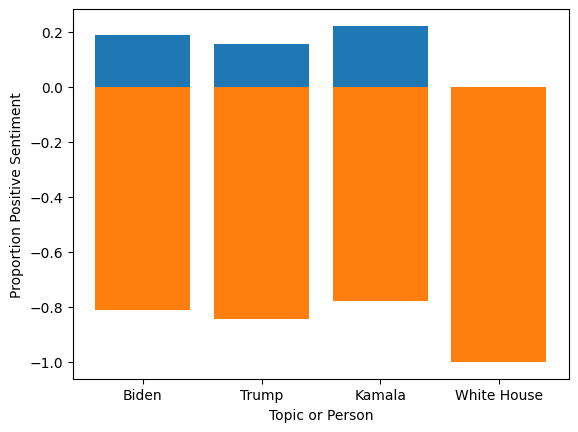

In [99]:
import matplotlib.pyplot as plt
plt.bar(height=[pos_biden,pos_trump,pos_kam,pos_wh],x=["Biden",'Trump','Kamala','White House'])
plt.bar(height=[neg_biden*-1,neg_trump*-1,neg_kam*-1,neg_wh*-1],x=["Biden",'Trump','Kamala','White House'])
plt.ylabel("Proportion Positive Sentiment")
plt.xlabel("Topic or Person")